In [36]:
#pip install xgboost

In [37]:
# Importing related libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tensorflow as tf
import keras
import autokeras as ak
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
from xgboost import XGBClassifier

In [38]:
# Set seed to make sure the code to be reproducible
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

In [39]:
# Import the dataset
filename = 'norwegian_dataset.csv'
training_data = pd.read_csv(filename, index_col = False)
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [40]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 19., 16.,  4.,  2.,  1., 11., 12., 13., 18.,  3.,
       10.,  9., 15., 17., 22.])

In [41]:
df = training_data
df.loc[df["LITHOLOGY_GEOLINK"] == 9, "LITHOLOGY_GEOLINK"]  = 8
df.loc[df["LITHOLOGY_GEOLINK"] == 10, "LITHOLOGY_GEOLINK"] = 9
df.loc[df["LITHOLOGY_GEOLINK"] == 11, "LITHOLOGY_GEOLINK"]  = 10
df.loc[df["LITHOLOGY_GEOLINK"] == 12, "LITHOLOGY_GEOLINK"] = 11
df.loc[df["LITHOLOGY_GEOLINK"] == 13, "LITHOLOGY_GEOLINK"] = 12
df.loc[df["LITHOLOGY_GEOLINK"] == 15, "LITHOLOGY_GEOLINK"] = 13
df.loc[df["LITHOLOGY_GEOLINK"] == 16, "LITHOLOGY_GEOLINK"] = 14
df.loc[df["LITHOLOGY_GEOLINK"] == 17, "LITHOLOGY_GEOLINK"] = 15
df.loc[df["LITHOLOGY_GEOLINK"] == 18, "LITHOLOGY_GEOLINK"] = 16
df.loc[df["LITHOLOGY_GEOLINK"] == 19, "LITHOLOGY_GEOLINK"] = 17
df.loc[df["LITHOLOGY_GEOLINK"] == 22, "LITHOLOGY_GEOLINK"] = 18
training_data = df
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [42]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 17., 14.,  4.,  2.,  1., 10., 11., 12., 16.,  3.,
        9.,  8., 13., 15., 18.])

In [43]:
training_data['LITHOLOGY_GEOLINK'] = training_data['LITHOLOGY_GEOLINK'].astype(int)

In [44]:
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [45]:
# Convert the deep and medium resistivity to be in a form of Log based 10.
training_data["RDEP"] = np.log10(training_data["RDEP"])
training_data["RMED"] = np.log10(training_data["RMED"])
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [46]:
# Convert the compressional and shear sonic logs into P- and S-waves velocities, in m/s
training_data['DTC'] = 100000/training_data['DTC']
training_data['DTS'] = 100000/training_data['DTS']
training_data.rename(columns={"DTC": "Vp", "DTS": "Vs"}, inplace = True)
training_data

,Vp,Vs,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [47]:
# Rename the Facies header from "LITHOLOGY_GEOLINK" into "Facies", for convenience.
training_data.rename(columns = {'LITHOLOGY_GEOLINK':'Facies'}, inplace = True)
training_data

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [48]:
training_data["WELL"].unique()

array(['15/9-23', '16/10-3 Tyr Central', '16/10-5 Isbjoern',
       '16/2-11 A Johan Sverdrup Appr', '16/2-16', '16/2-6',
       '16/2-7 Johan Sverdrup Appr', '16/5-3 Johan Sverdrup Appr',
       '16/7-6', '25/10-10  Balder Triassic', '25/10-9 Aegis',
       '25/11-19 S  Balder Appr', '25/11-24 Jakob South',
       '25/8-5 S  Jotun', '31/2-19 S', '31/2-21 S', '31/3-4', '32/2-1',
       '33/6-3 S', '34/10-35', '34/11-1', '34/3-1 A', '34/3-2 S',
       '34/3-3 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/6-1',
       '35/11-10', '35/11-11', '35/11-13', '35/11-5', '35/11-6',
       '35/3-7 S', '35/6-2 S', '35/8-6 S', '35/9-10 S', '35/9-2',
       '35/9-5', '35/9-7', '35/9-8', '35/9-9', '7/1-2 S'], dtype=object)

Remove a single well to use as a blind test later. In this case, the blind well is: 15/9-23

In [49]:
blind = training_data[training_data['WELL'] == '15/9-23']
training_data = training_data[training_data['WELL'] != '15/9-23']

In [50]:
blind['Facies'].unique()

array([ 6,  7,  5, 17, 14,  4,  2,  1, 10, 11, 12, 16,  3])

In [51]:
training_data['Facies'].unique()

array([ 9, 12,  8, 11, 10,  2,  5,  4,  3,  6,  7,  1, 14, 13, 15, 18, 17,
       16])

In [52]:
training_data['WELL'] = training_data['WELL'].astype('category')

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
# Define facies colors and labels

# 1 = Sandstone, 2 = Silty sand, 3 = Cross Bedded Sst, 4 = Sandy Silt, 5 = Silt
# 6 = Shaly Silt, 7 = Silty Shale, 9 = Chalk, 10 = Porous LST, 11 = LST,
# 12 = Argillaceous Limestone, 13 = Marlstone, 15 = Dolomite, 16 = Calcareous Cement
# 17 = Conglomerate, 18 = Coal, 19 = Cinerite, 22 = Anhydrite

facies_colors = ['#FFFF00','#FDE992','#FFD700','#D2B48C','#FF9999','#FFCC00','#026440',
                 '#3d85c6','#6fa8dc','#9fc5e8','#1e90ff','#00bfff','#44ffff','#36cccc',
                 '#e3b778','#000000', '#227f7f', '#FF77FF']

facies_labels = ['SS', 'SiS', 'CSS', 'SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', 'LS','ALS','M','D','CC',
                 'COM','COAL','CIN','ANH']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ int(row['Facies']) -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)
training_data.describe()

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,Depth
count,179001.000000,179001.000000,179001.000000,179001.000000,179001.000000,179001.000000,179001.000000,179001.000000,179001.000000
mean,1108.424391,555.463115,85.024165,7.070005,2.103066,0.446440,2.444573,0.448445,2720.521198
std,350.448033,229.959969,41.682120,3.526951,7.973450,0.456329,0.151355,0.457802,814.322484
min,261.159283,97.222720,0.207500,1.000000,-0.015100,-0.915044,1.244003,-0.927363,1201.265503
25%,956.626514,436.314443,58.656017,5.000000,0.208600,0.157721,2.359100,0.159086,2059.429932
50%,1123.535984,580.747429,80.702522,6.000000,0.283300,0.400153,2.473178,0.408935,2611.423096
75%,1247.844367,676.655010,106.062500,10.000000,0.355800,0.682443,2.557600,0.694351,3243.681641
max,5519.963395,2875.440293,1163.366455,18.000000,61.007858,4.466433,3.217700,4.000000,4981.242676


In [54]:
# A function to plot the facies classes, based on the facies_color and facies_label from the previous cell.

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(8, 12))
    ax[0].plot(logs.Vp, logs.Depth, '-g')
    ax[1].plot(logs.Vs, logs.Depth, '-')
    ax[2].plot(logs.GR, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.Depth, '-', color='black')
    ax[5].plot(logs.RMED, logs.Depth, '-', color='orange')
    ax[6].plot(logs.RHOB, logs.Depth, '-', color='cyan')
    im=ax[7].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((6*' ').join(['SS', 'SiS', '  CSS', ' SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', '  LS','  ALS','M','   D','   CC',
                                 'COM','COAL','CIN','ANH']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Vp")
    ax[0].set_xlim(logs.Vp.min(),logs.Vp.max())
    ax[1].set_xlabel("Vs")
    ax[1].set_xlim(logs.Vs.min(),logs.Vs.max())
    ax[2].set_xlabel("GR")
    ax[2].set_xlim(logs.GR.min(),logs.GR.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[5].set_xlabel("RMED")
    ax[5].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[6].set_xlabel("RHOB")
    ax[6].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[7].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]);
    ax[7].set_yticklabels([]); ax[7].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)
    
    # Do the plot code
    f.savefig('facies_log_plot.svg', format='svg', dpi=1200)

For example, plotting Wells 31/2-19 S and 31/2-19 S using the function for plotting facies classes, as seen in the previous cell. 

Also with the features (seven well logs)

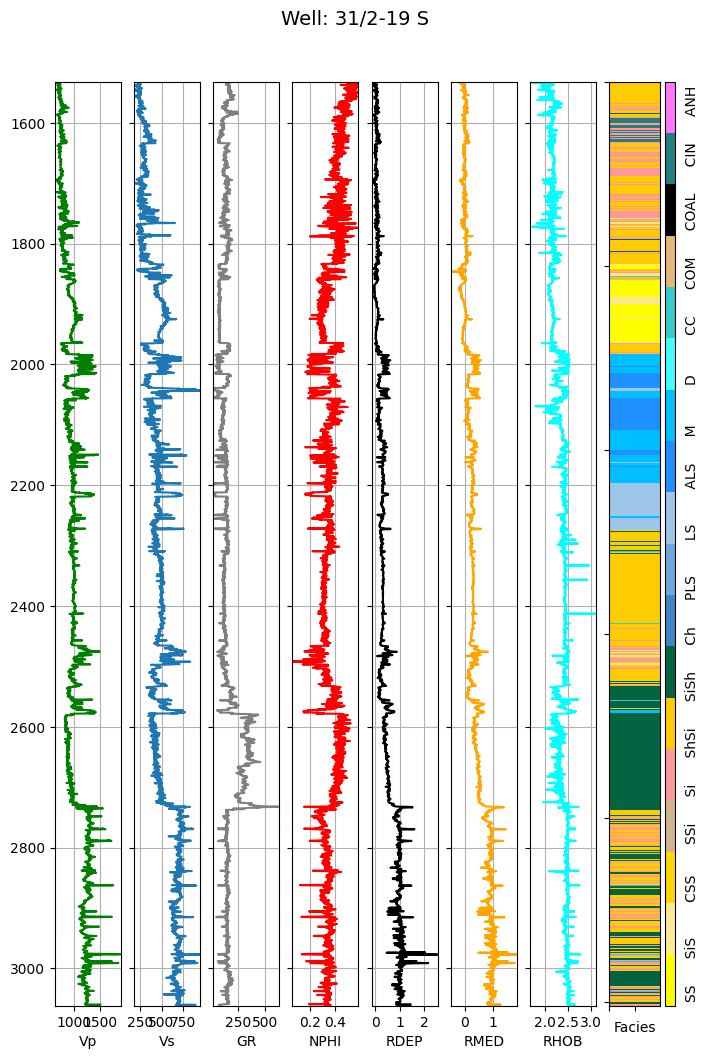

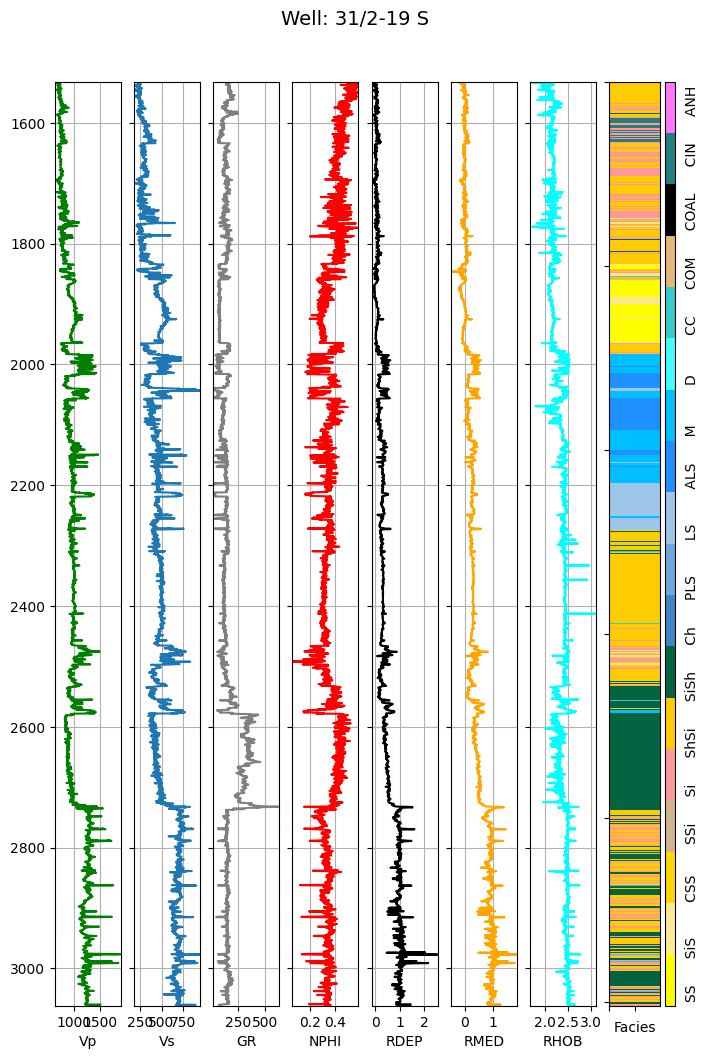

In [55]:
make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

SS       8207
SiS     12400
CSS      3638
SSi      5845
Si      31303
ShSi    36468
SiSh    25708
Ch       3145
PLS      1401
LS       9148
ALS      8321
M       25292
D        2673
CC       2899
COM        44
COAL      262
CIN      1959
ANH       288
Name: Facies, dtype: int64

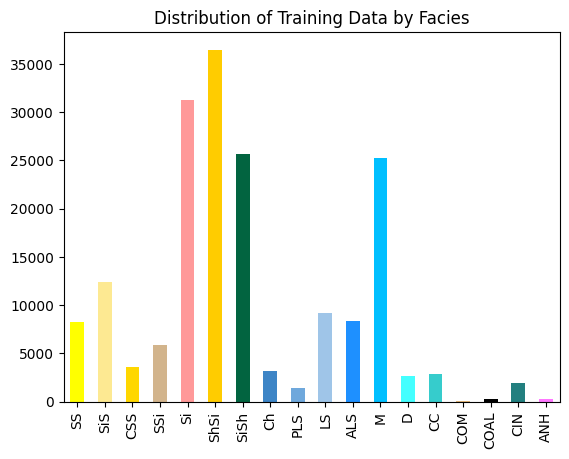

In [56]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

# Conditioning the data set

In [57]:
correct_facies_labels = training_data['Facies'].values

feature_vectors = training_data.drop(['WELL', 'Depth','Facies','FaciesLabels'], axis=1)
feature_vectors.describe()

,Vp,Vs,GR,NPHI,RDEP,RHOB,RMED
count,179001.000000,179001.000000,179001.000000,179001.000000,179001.000000,179001.000000,179001.000000
mean,1108.424391,555.463115,85.024165,2.103066,0.446440,2.444573,0.448445
std,350.448033,229.959969,41.682120,7.973450,0.456329,0.151355,0.457802
min,261.159283,97.222720,0.207500,-0.015100,-0.915044,1.244003,-0.927363
25%,956.626514,436.314443,58.656017,0.208600,0.157721,2.359100,0.159086
50%,1123.535984,580.747429,80.702522,0.283300,0.400153,2.473178,0.408935
75%,1247.844367,676.655010,106.062500,0.355800,0.682443,2.557600,0.694351
max,5519.963395,2875.440293,1163.366455,61.007858,4.466433,3.217700,4.000000


In [58]:
# Perform Standard scaler for the dataset

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [59]:
df_scaled_feat = pd.DataFrame(scaled_features,columns=['Vp','Vs','GR','NPHI','RDEP_log10','RHOB','RMED_log10'])
df_scaled_feat

,Vp,Vs,GR,NPHI,RDEP_log10,RHOB,RMED_log10
0,0.339966,0.330795,-0.330323,-0.198929,-0.860764,-1.214547,-1.079820
1,0.388753,0.354662,-0.457191,-0.217238,-0.857147,-0.127503,-1.088584
2,0.431748,0.375743,-0.444280,-0.227331,-0.854568,-0.742820,-1.089441
3,0.442636,0.383546,-0.413933,-0.230131,-0.848937,-0.763863,-1.086165
4,0.414664,0.381427,-0.442292,-0.227046,-0.886897,-0.820611,-1.111157
...,...,...,...,...,...,...,...
178996,-0.379489,1.006491,-1.304955,-0.242878,-1.155644,-0.728989,-1.204609
178997,-0.383247,1.006591,-1.256679,-0.241650,-1.123808,-0.519477,-1.167882
178998,-0.384438,1.006575,-1.156196,-0.240797,-1.076674,-0.431935,-1.115689
178999,-0.365079,1.006843,-1.037955,-0.241721,-1.057955,-0.556449,-1.091363


In [60]:
scaled_features

array([[ 0.33996584,  0.33079456, -0.33032324, ..., -0.86076369,
        -1.2145469 , -1.07982029],
       [ 0.38875289,  0.35466192, -0.45719097, ..., -0.85714705,
        -0.12750257, -1.08858376],
       [ 0.43174829,  0.37574286, -0.4442802 , ..., -0.85456812,
        -0.7428199 , -1.08944097],
       ...,
       [-0.38443758,  1.00657453, -1.15619644, ..., -1.07667366,
        -0.43193516, -1.11568937],
       [-0.3650792 ,  1.00684329, -1.03795547, ..., -1.0579555 ,
        -0.55644941, -1.09136317],
       [-0.27056805,  1.00877863, -1.14252047, ..., -1.07520113,
        -0.73693798, -1.10189395]])

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=123)

In [62]:
x_train

array([[ 0.11493873,  0.71165858, -0.35943252, ..., -0.07032924,
         0.42170382, -0.07336981],
       [-0.17105228, -0.21865536, -1.0744497 , ..., -0.34421424,
        -0.23040779, -0.34875251],
       [ 0.26740837,  0.19404024,  0.33620102, ...,  0.11897166,
         0.75535854,  0.19819016],
       ...,
       [ 0.57816931,  0.60847183, -1.53991439, ...,  0.17107914,
        -0.07124944,  0.146644  ],
       [-1.29377144, -1.20130091, -0.69523449, ..., -1.39891802,
        -1.68262724, -1.44708019],
       [ 0.13279802,  0.12430421, -0.52004131, ..., -0.84631336,
        -0.78870799, -0.8672375 ]])

# Conventional ML - SVM Classification

In [63]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [64]:
clf_SVC = SVC(gamma='scale', C=1000, kernel='rbf')
clf_SVC.fit(x_train, y_train)

SVC(C=1000)

In [65]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred_SVC = clf_SVC.fit(x_train, y_train).predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred_SVC)

# compute and print accuracy score
print('Training Error is: {0:0.4f}'. format(clf_SVC.fit(x_train, y_train).score(x_train, y_train)))
print('Testing Accuracy is: {0:0.4f}'. format(accuracy_score(y_test, y_pred_SVC)))

Training Error is: 0.7337
Testing Accuracy is: 0.7221


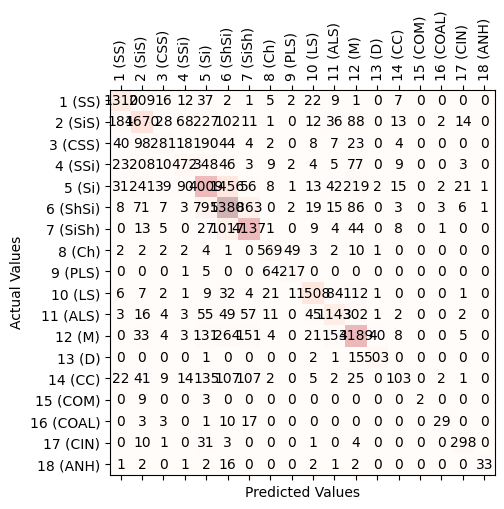

              precision    recall  f1-score   support

           1       0.80      0.80      0.80      1633
           2       0.63      0.68      0.66      2456
           3       0.68      0.39      0.50       719
           4       0.69      0.39      0.50      1219
           5       0.67      0.64      0.65      6246
           6       0.63      0.74      0.68      7258
           7       0.76      0.79      0.77      5266
           8       0.82      0.88      0.85       647
           9       0.79      0.76      0.77       287
          10       0.90      0.84      0.87      1789
          11       0.76      0.68      0.72      1693
          12       0.81      0.84      0.82      5006
          13       0.92      0.96      0.94       522
          14       0.60      0.18      0.28       575
          15       1.00      0.14      0.25        14
          16       0.74      0.46      0.57        63
          17       0.85      0.86      0.85       348
          18       0.94    

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
squad = ['1 (SS)','2 (SiS)','3 (CSS)','4 (SSi)','5 (Si)','6 (ShSi)','7 (SiSh)','8 (Ch)','9 (PLS)','10 (LS)',
         '11 (ALS)', '12 (M)', '13 (D)', '14 (CC)', '15 (COM)', '16 (COAL)', '17 (CIN)', '18 (ANH)']

ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=90)
ax.set_yticks(x1)
ax.set_yticklabels(squad)

plt.show()
print(classification_report(y_test, y_pred_SVC))

# Conventional ML - RF Classification

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
RFC = RandomForestClassifier(n_estimators=1000, random_state=0)
RFC.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [69]:
y_pred_RFC = RFC.predict(x_test)
y_pred_RFC

array([ 5,  4,  5, ..., 11,  4, 10])

In [70]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred_RFC = RFC.fit(x_train, y_train).predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred_RFC)

from sklearn.metrics import accuracy_score
# compute and print accuracy score
print('Training Accuracy is: {0:0.4f}'. format(RFC.fit(x_train, y_train).score(x_train, y_train)))
print('Testing Accuracy is: {0:0.4f}'. format(accuracy_score(y_test, y_pred_RFC)))

Training Accuracy is: 1.0000
Testing Accuracy is: 0.8195


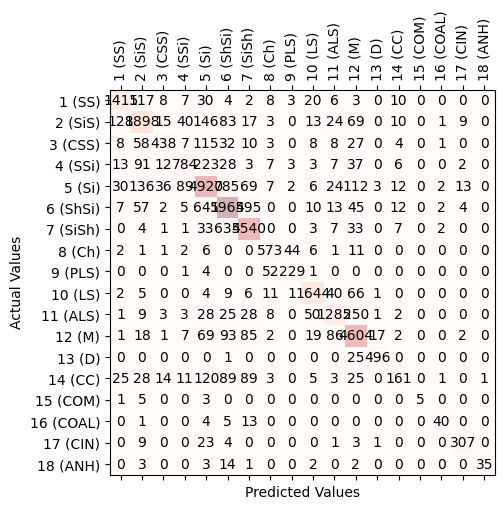

              precision    recall  f1-score   support

           1       0.87      0.87      0.87      1633
           2       0.78      0.77      0.78      2456
           3       0.82      0.61      0.70       719
           4       0.82      0.64      0.72      1219
           5       0.77      0.79      0.78      6246
           6       0.77      0.82      0.79      7258
           7       0.85      0.86      0.85      5266
           8       0.85      0.89      0.87       647
           9       0.81      0.80      0.80       287
          10       0.92      0.92      0.92      1789
          11       0.85      0.76      0.80      1693
          12       0.87      0.92      0.89      5006
          13       0.96      0.95      0.95       522
          14       0.71      0.28      0.40       575
          15       1.00      0.36      0.53        14
          16       0.82      0.63      0.71        63
          17       0.91      0.88      0.90       348
          18       0.97    

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
squad = ['1 (SS)','2 (SiS)','3 (CSS)','4 (SSi)','5 (Si)','6 (ShSi)','7 (SiSh)','8 (Ch)','9 (PLS)','10 (LS)',
         '11 (ALS)', '12 (M)', '13 (D)', '14 (CC)', '15 (COM)', '16 (COAL)', '17 (CIN)', '18 (ANH)']

ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=90)
ax.set_yticks(x1)
ax.set_yticklabels(squad)

plt.show()
print(classification_report(y_test, y_pred_RFC))

# Conventional ML - XGBoost Classification

In [72]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
y_train_le = le.fit_transform(y_train) # Change class from [1, 2, 3, 4, ..., 9] to [0, 1, 2, 3, ..., 8]

In [73]:
y_train

array([ 2, 11,  6, ..., 10,  5,  5])

In [74]:
y_train_le

array([ 1, 10,  5, ...,  9,  4,  4], dtype=int64)

In [75]:
XGB = XGBClassifier(n_estimators = 1000, learning_rate = 0.01, max_depth = 10)

In [76]:
XGB.fit(x_train, y_train_le)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [77]:
y_pred_XGB_ = XGB.predict(x_test)
y_pred_XGB = le.inverse_transform(y_pred_XGB_) # Change class back from [0, 1, 2, 3, ..., 8] to [1, 2, 3, 4, ..., 9]
y_pred_XGB

array([ 5,  4,  5, ..., 11,  4, 10])

In [78]:
from sklearn.metrics import accuracy_score
# The confusion matrix helps visualize the performance of the algorithm.
cm = metrics.confusion_matrix(y_test, y_pred_XGB)

# compute and print accuracy score
# compute and print accuracy score
print('Training Accuracy is: {0:0.4f}'. format(XGB.fit(x_train, y_train_le).score(x_train, y_train_le)))
print('Testing Accuracy is: {0:0.4f}'. format(accuracy_score(y_test, y_pred_XGB)))

Training Accuracy is: 0.8670
Testing Accuracy is: 0.7675


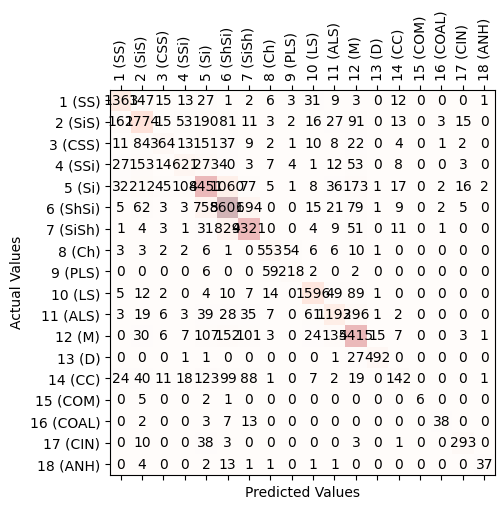

              precision    recall  f1-score   support

           1       0.83      0.83      0.83      1633
           2       0.69      0.72      0.71      2456
           3       0.75      0.51      0.60       719
           4       0.74      0.51      0.60      1219
           5       0.72      0.71      0.71      6246
           6       0.70      0.77      0.74      7258
           7       0.81      0.82      0.81      5266
           8       0.84      0.85      0.85       647
           9       0.77      0.76      0.76       287
          10       0.90      0.89      0.89      1789
          11       0.79      0.70      0.75      1693
          12       0.83      0.88      0.85      5006
          13       0.96      0.94      0.95       522
          14       0.63      0.25      0.35       575
          15       1.00      0.43      0.60        14
          16       0.81      0.60      0.69        63
          17       0.87      0.84      0.86       348
          18       0.88    

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
squad = ['1 (SS)','2 (SiS)','3 (CSS)','4 (SSi)','5 (Si)','6 (ShSi)','7 (SiSh)','8 (Ch)','9 (PLS)','10 (LS)',
         '11 (ALS)', '12 (M)', '13 (D)', '14 (CC)', '15 (COM)', '16 (COAL)', '17 (CIN)', '18 (ANH)']

ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=90)
ax.set_yticks(x1)
ax.set_yticklabels(squad)

plt.show()
print(classification_report(y_test, y_pred_XGB))

## Applying the classification model to the blind data

We held a well back from the training, and stored it in a dataframe called `blind`:

In [80]:
blind

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.3916,-0.148803,2.4802,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.3911,-0.141937,2.5022,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.4078,-0.137453,2.4731,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.4077,-0.138346,2.4813,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.4260,-0.152181,2.4709,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
5713,735.225981,355.084999,68.602997,5,0.1447,0.107549,2.5170,0.096051,15/9-23,3193.591064
5714,732.695169,360.638619,70.434700,6,0.1382,0.193456,2.4987,0.168952,15/9-23,3193.743408
5715,733.337295,368.611133,75.727898,6,0.1450,0.256444,2.5086,0.243603,15/9-23,3193.895752
5716,737.799420,377.090986,85.059097,6,0.1523,0.235026,2.5539,0.270257,15/9-23,3194.048096


In [82]:
y_blind = blind['Facies'].values
well_features = blind.drop(['Facies', 'WELL', 'Depth'], axis=1)
x_blind = scaler.transform(well_features)

## SVC Prediction

In [83]:
y_pred_SVC = clf_SVC.predict(x_blind)
blind['Prediction_SVC'] = y_pred_SVC.astype(float)

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
blind

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth,Prediction_SVC
0,864.354985,373.319164,96.910202,6,0.3916,-0.148803,2.4802,-0.176721,15/9-23,2315.461914,7.0
1,862.738304,367.195897,108.976501,6,0.3911,-0.141937,2.5022,-0.174280,15/9-23,2315.614502,7.0
2,859.731392,356.882324,126.231796,6,0.4078,-0.137453,2.4731,-0.153141,15/9-23,2315.766846,7.0
3,852.451690,352.642505,149.429504,6,0.4077,-0.138346,2.4813,-0.136439,15/9-23,2315.919189,7.0
4,831.515102,343.942351,163.915497,6,0.4260,-0.152181,2.4709,-0.169219,15/9-23,2316.071533,5.0
...,...,...,...,...,...,...,...,...,...,...,...
5713,735.225981,355.084999,68.602997,5,0.1447,0.107549,2.5170,0.096051,15/9-23,3193.591064,12.0
5714,732.695169,360.638619,70.434700,6,0.1382,0.193456,2.4987,0.168952,15/9-23,3193.743408,2.0
5715,733.337295,368.611133,75.727898,6,0.1450,0.256444,2.5086,0.243603,15/9-23,3193.895752,2.0
5716,737.799420,377.090986,85.059097,6,0.1523,0.235026,2.5539,0.270257,15/9-23,3194.048096,11.0


# RFC Prediction

In [85]:
y_pred_RFC = RFC.predict(x_blind)
blind['Prediction_RFC'] = y_pred_RFC.astype(float)

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
blind

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth,Prediction_SVC,Prediction_RFC
0,864.354985,373.319164,96.910202,6,0.3916,-0.148803,2.4802,-0.176721,15/9-23,2315.461914,7.0,7.0
1,862.738304,367.195897,108.976501,6,0.3911,-0.141937,2.5022,-0.174280,15/9-23,2315.614502,7.0,7.0
2,859.731392,356.882324,126.231796,6,0.4078,-0.137453,2.4731,-0.153141,15/9-23,2315.766846,7.0,7.0
3,852.451690,352.642505,149.429504,6,0.4077,-0.138346,2.4813,-0.136439,15/9-23,2315.919189,7.0,7.0
4,831.515102,343.942351,163.915497,6,0.4260,-0.152181,2.4709,-0.169219,15/9-23,2316.071533,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5713,735.225981,355.084999,68.602997,5,0.1447,0.107549,2.5170,0.096051,15/9-23,3193.591064,12.0,5.0
5714,732.695169,360.638619,70.434700,6,0.1382,0.193456,2.4987,0.168952,15/9-23,3193.743408,2.0,5.0
5715,733.337295,368.611133,75.727898,6,0.1450,0.256444,2.5086,0.243603,15/9-23,3193.895752,2.0,12.0
5716,737.799420,377.090986,85.059097,6,0.1523,0.235026,2.5539,0.270257,15/9-23,3194.048096,11.0,2.0


# XGBoost Prediction

In [87]:
y_pred_XGB_ = XGB.predict(x_blind)
y_pred_XGB = le.inverse_transform(y_pred_XGB_)
blind['Prediction_XGB'] = y_pred_XGB.astype(float)

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
y_pred_XGB

array([12, 12,  7, ...,  5,  5,  5])

In [89]:
blind

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth,Prediction_SVC,Prediction_RFC,Prediction_XGB
0,864.354985,373.319164,96.910202,6,0.3916,-0.148803,2.4802,-0.176721,15/9-23,2315.461914,7.0,7.0,12.0
1,862.738304,367.195897,108.976501,6,0.3911,-0.141937,2.5022,-0.174280,15/9-23,2315.614502,7.0,7.0,12.0
2,859.731392,356.882324,126.231796,6,0.4078,-0.137453,2.4731,-0.153141,15/9-23,2315.766846,7.0,7.0,7.0
3,852.451690,352.642505,149.429504,6,0.4077,-0.138346,2.4813,-0.136439,15/9-23,2315.919189,7.0,7.0,5.0
4,831.515102,343.942351,163.915497,6,0.4260,-0.152181,2.4709,-0.169219,15/9-23,2316.071533,5.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713,735.225981,355.084999,68.602997,5,0.1447,0.107549,2.5170,0.096051,15/9-23,3193.591064,12.0,5.0,12.0
5714,732.695169,360.638619,70.434700,6,0.1382,0.193456,2.4987,0.168952,15/9-23,3193.743408,2.0,5.0,5.0
5715,733.337295,368.611133,75.727898,6,0.1450,0.256444,2.5086,0.243603,15/9-23,3193.895752,2.0,12.0,5.0
5716,737.799420,377.090986,85.059097,6,0.1523,0.235026,2.5539,0.270257,15/9-23,3194.048096,11.0,2.0,5.0


In [90]:
# A function to plot comparison between actual and predicted facies classes, along with its features (seven well logs)

def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=9, figsize=(9, 12))
    ax[0].plot(logs.Vp, logs.Depth, '-g')
    ax[1].plot(logs.Vs, logs.Depth, '-')
    ax[2].plot(logs.GR, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.Depth, '-', color='black')
    ax[5].plot(logs.RMED, logs.Depth, '-', color='orange')
    ax[6].plot(logs.RHOB, logs.Depth, '-', color='cyan')
    im1 = ax[7].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    im2 = ax[8].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    
    divider = make_axes_locatable(ax[8])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((6*' ').join(['SS', 'SiS', '  CSS', ' SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', '  LS','  ALS','M','   D','   CC',
                                 'COM','COAL','CIN','ANH']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Vp")
    ax[0].set_xlim(logs.Vp.min(),logs.Vp.max())
    ax[1].set_xlabel("Vs")
    ax[1].set_xlim(logs.Vs.min(),logs.Vs.max())
    ax[2].set_xlabel("GR")
    ax[2].set_xlim(logs.GR.min(),logs.GR.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[5].set_xlabel("RMED")
    ax[5].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[6].set_xlabel("RHOB")
    ax[6].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[7].set_xlabel('Facies')
    ax[8].set_xlabel(compadre)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([]); ax[6].set_yticklabels([]); ax[6].set_xticklabels([])
    ax[7].set_xticklabels([]); ax[7].set_yticklabels([]); ax[8].set_xticklabels([]); ax[8].set_yticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)
    
    # Do the plot code
    f.savefig('facies_log_plot.svg', format='svg', dpi=1200)

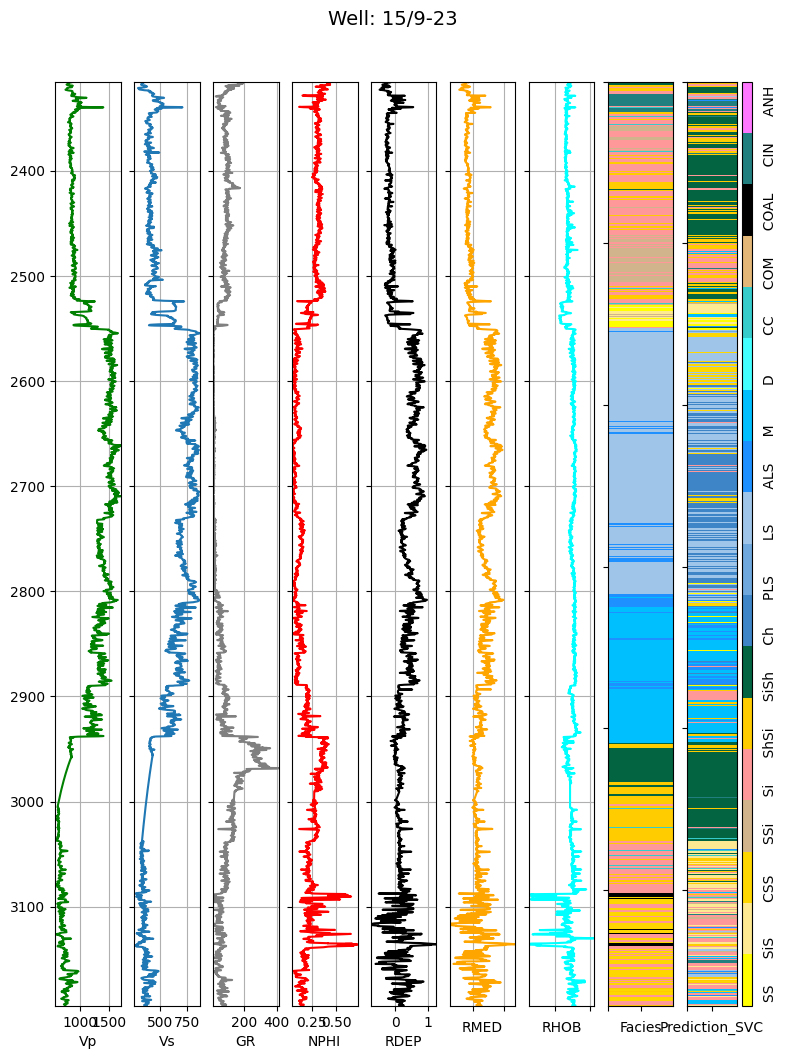

In [91]:
compare_facies_plot(blind, 'Prediction_SVC', facies_colors)

In [92]:
# The confusion matrix helps visualize the performance of the algorithm.
cm = metrics.confusion_matrix(blind['Facies'], blind['Prediction_SVC'])

# compute and print accuracy score
print('Blind test accuracy score is: {0:0.4f}'. format(accuracy_score(blind['Facies'], blind['Prediction_SVC'])))

Blind test accuracy score is: 0.2949


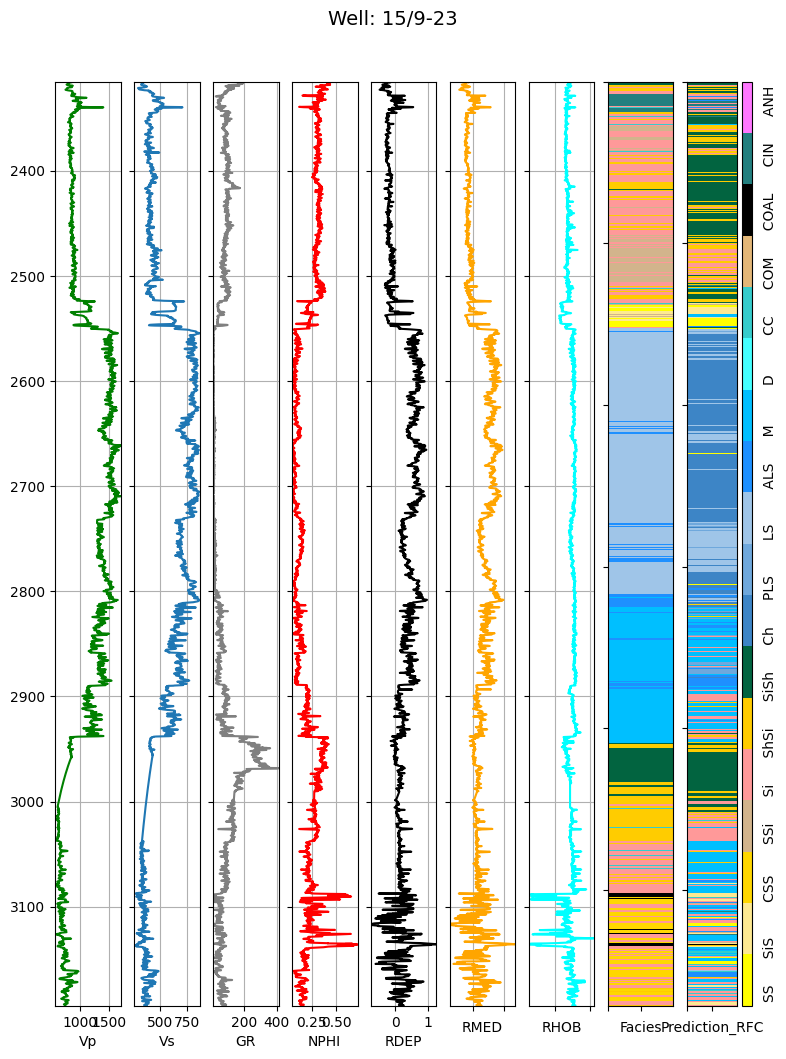

In [93]:
compare_facies_plot(blind, 'Prediction_RFC', facies_colors)

In [94]:
# The confusion matrix helps visualize the performance of the algorithm.
cm = metrics.confusion_matrix(blind['Facies'], blind['Prediction_RFC'])

# compute and print accuracy score
print('Blind test accuracy score is: {0:0.4f}'. format(accuracy_score(blind['Facies'], blind['Prediction_RFC'])))

Blind test accuracy score is: 0.2476


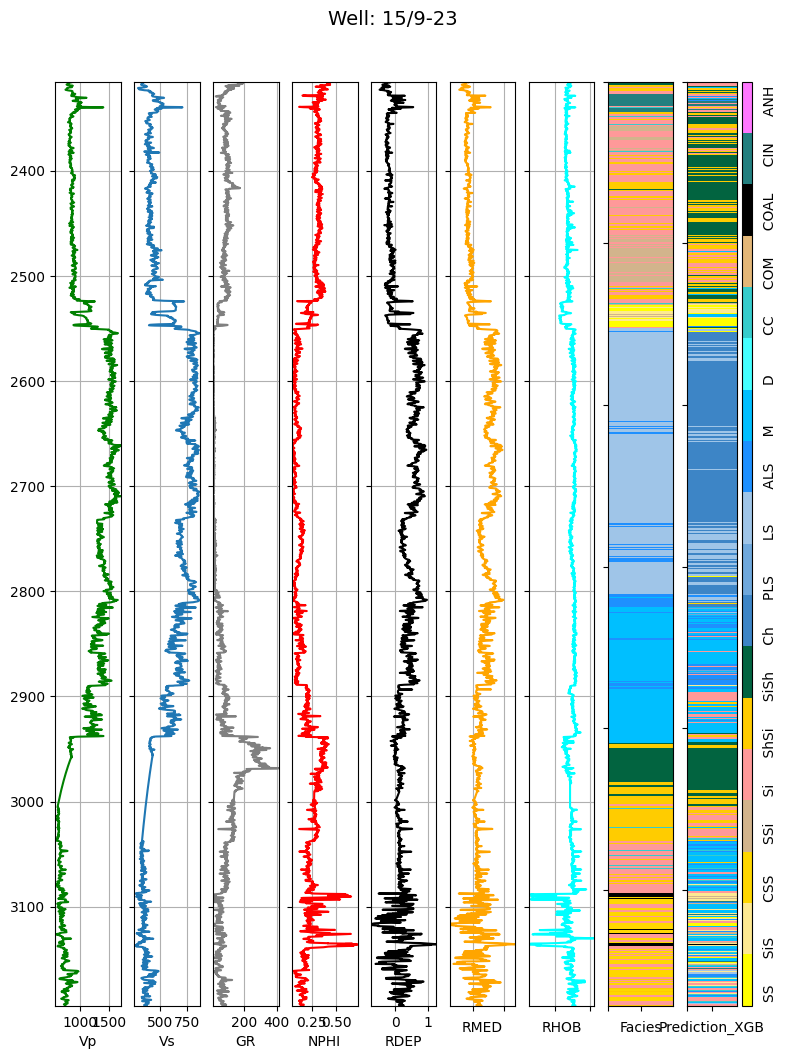

In [95]:
compare_facies_plot(blind, 'Prediction_XGB', facies_colors)

In [96]:
# The confusion matrix helps visualize the performance of the algorithm.
cm = metrics.confusion_matrix(blind['Facies'], blind['Prediction_XGB'])

# compute and print accuracy score
print('Blind test accuracy score is: {0:0.4f}'. format(accuracy_score(blind['Facies'], blind['Prediction_XGB'])))

Blind test accuracy score is: 0.2522


In [98]:
blind_data_save = blind
blind_data_save.to_csv('well15_CONV_facies.csv', index=False)